# FordGo Bike System Data Analysis
## by Mohit Patil


## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#gather)
- [Assessment Summary](#assess_summary)
- [Cleaning the dataset](#clean)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Trivariate Exploration](#multi)
- [Summary](#summary)



<a id='intro'></a>
## Introduction
# FordGo Bike System Data Analysis

Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='gather'></a>
## Preliminary Wrangling

### Load the Dataset

In [3]:
ford = pd.read_csv('201801-fordgobike-tripdata.csv')

In [4]:
ford.shape

(94802, 14)

### Visual Assessment

In [5]:
ford.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
93373,246,2018-01-02 06:33:08.8560,2018-01-02 06:37:15.2100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2860,Subscriber,No
75760,779,2018-01-09 16:43:41.7450,2018-01-09 16:56:41.0970,11,Davis St at Jackson St,37.797280,-122.398436,81,Berry St at 4th St,37.775880,-122.393170,2072,Subscriber,No
76599,450,2018-01-09 10:51:15.1210,2018-01-09 10:58:46.0050,13,Commercial St at Montgomery St,37.794231,-122.402923,28,The Embarcadero at Bryant St,37.787168,-122.388098,2016,Subscriber,No
24282,802,2018-01-25 12:31:47.4420,2018-01-25 12:45:09.8830,107,17th St at Dolores St,37.763015,-122.426497,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3574,Customer,No
38615,246,2018-01-21 12:41:43.0870,2018-01-21 12:45:49.1460,248,Telegraph Ave at Ashby Ave,37.855956,-122.259795,249,Russell St at College Ave,37.858473,-122.253253,1989,Subscriber,No
11490,294,2018-01-29 13:56:14.4410,2018-01-29 14:01:09.2090,266,Parker St at Fulton St,37.862464,-122.264791,241,Ashby BART Station,37.852477,-122.270213,3719,Subscriber,No
61137,189,2018-01-13 18:33:08.9540,2018-01-13 18:36:18.7440,26,1st St at Folsom St,37.787290,-122.394380,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,2205,Subscriber,No
52028,764,2018-01-17 08:11:16.1270,2018-01-17 08:24:00.8140,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,59,S Van Ness Ave at Market St,37.774814,-122.418954,1539,Subscriber,No
89426,953,2018-01-03 08:41:13.3180,2018-01-03 08:57:07.1480,31,Raymond Kimbell Playground,37.783813,-122.434559,321,5th at Folsom,37.780146,-122.403071,2901,Subscriber,No
66630,523,2018-01-12 06:45:41.7990,2018-01-12 06:54:25.2970,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2685,Subscriber,No


In [6]:
ford.shape

(94802, 14)

In [7]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  bike_share_for_all_trip  94802 non-null  object 
dtypes: float64(4), int64(4

In [8]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000


In [9]:
ford.duplicated().sum()

0

In [10]:
ford.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

<a id='assess_summary'></a>
## Assessment Summary

- Relatively the data is clean and does not need much attention for cleaning purpose.
- The data type of the start_time and end_time features,It should be converted to datetime object.
- The user_type and the bike_share_for_all_trip should be converted to categorical variables.
- We can use the datetime object to extract more specific information about the month,weekday etc.
- We can calculate the total displacement with the help of the difference between the latlang of source and destination.

<a id='clean'></a>
### Cleaning the Dataset

In [11]:
ford['start_time'] = pd.to_datetime(ford['start_time'])

In [12]:
ford['end_time'] = pd.to_datetime(ford['end_time'])

In [13]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             94802 non-null  int64         
 1   start_time               94802 non-null  datetime64[ns]
 2   end_time                 94802 non-null  datetime64[ns]
 3   start_station_id         94802 non-null  int64         
 4   start_station_name       94802 non-null  object        
 5   start_station_latitude   94802 non-null  float64       
 6   start_station_longitude  94802 non-null  float64       
 7   end_station_id           94802 non-null  int64         
 8   end_station_name         94802 non-null  object        
 9   end_station_latitude     94802 non-null  float64       
 10  end_station_longitude    94802 non-null  float64       
 11  bike_id                  94802 non-null  int64         
 12  user_type                94802 n

In [14]:
ford['user_type'] = ford['user_type'].astype('category')

In [15]:
ford['bike_share_for_all_trip'] = ford['bike_share_for_all_trip'].astype('category')

In [16]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             94802 non-null  int64         
 1   start_time               94802 non-null  datetime64[ns]
 2   end_time                 94802 non-null  datetime64[ns]
 3   start_station_id         94802 non-null  int64         
 4   start_station_name       94802 non-null  object        
 5   start_station_latitude   94802 non-null  float64       
 6   start_station_longitude  94802 non-null  float64       
 7   end_station_id           94802 non-null  int64         
 8   end_station_name         94802 non-null  object        
 9   end_station_latitude     94802 non-null  float64       
 10  end_station_longitude    94802 non-null  float64       
 11  bike_id                  94802 non-null  int64         
 12  user_type                94802 n

In [17]:
ford['start_time_month'] = ford['start_time'].dt.strftime('%B')

In [18]:
ford['start_time_month_num'] = ford['start_time'].dt.month.astype(int)

In [19]:
ford['start_time_weekday'] = ford['start_time'].dt.strftime('%a')

In [20]:
ford['start_time_hour'] = ford['start_time'].dt.hour
ford['end_time_hour'] = ford['end_time'].dt.hour

In [21]:
ford['duration_min'] = ford['duration_sec']/60
ford['duration_min'] = ford['duration_min'].astype(int)

In [22]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             94802 non-null  int64         
 1   start_time               94802 non-null  datetime64[ns]
 2   end_time                 94802 non-null  datetime64[ns]
 3   start_station_id         94802 non-null  int64         
 4   start_station_name       94802 non-null  object        
 5   start_station_latitude   94802 non-null  float64       
 6   start_station_longitude  94802 non-null  float64       
 7   end_station_id           94802 non-null  int64         
 8   end_station_name         94802 non-null  object        
 9   end_station_latitude     94802 non-null  float64       
 10  end_station_longitude    94802 non-null  float64       
 11  bike_id                  94802 non-null  int64         
 12  user_type                94802 n

In [23]:
import math
def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [24]:
ford['displacement_km'] = ford.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [25]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,displacement_km
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,No,January,1,Wed,22,19,1254,2.492254
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,No,January,1,Wed,16,15,1423,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,3039,Customer,No,January,1,Wed,14,10,1192,2.974502
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,321,Customer,No,January,1,Wed,14,7,1017,2.049710
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,617,Subscriber,No,January,1,Wed,19,6,666,2.440571


In [26]:
ford.to_csv('ford_c.csv',index=False)

### What is the structure of your dataset?
- The dataset consists of 94802 records along with 10 attributes.
- The dataset gives the starting and the ending time of the ride.
- The dataset also conveys the information of the starting position of the customer and the ending position.
- It also highlights the station names along with their ids.
- The user_type feature gives info about the customer association with the servive provider.


#### The columns that I have added are :
- start_time_month gives the month in words.
- start_time_month_num gives the number of the month ranging from (1-12).
- start_time_weekday gives the day of the starting of the journey.
- start_time_hour gives the starting time hour.
- end_time_hour gives the ending time hour.
- duration_min gives the duration of ride in minutes.



### What is/are the main feature(s) of interest in your dataset?
The main features of my interest are the starting time and the ending time.The starting time can reveal many insights according to different localities that can help an organization to manage its services and maintain the bike stocks.The displacement can also be a very promising feature in understanding the customer behavior which is necessary for a business.The features can be studied in order to reveal individual customer patterns in order to serve the customers better and maximize their revenue.   

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The key features would be the starting time and the ending time.Some insights can be attributed to the displacement of the rides.

<a id='uni'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [27]:
ford = pd.read_csv('ford_c.csv')

In [28]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,displacement_km
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,No,January,1,Wed,22,19,1254,2.492254
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,No,January,1,Wed,16,15,1423,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,3039,Customer,No,January,1,Wed,14,10,1192,2.974502
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,321,Customer,No,January,1,Wed,14,7,1017,2.049710
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,617,Subscriber,No,January,1,Wed,19,6,666,2.440571


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [29]:
ford[ford['duration_sec']<3000].count()

duration_sec               92722
start_time                 92722
end_time                   92722
start_station_id           92722
start_station_name         92722
start_station_latitude     92722
start_station_longitude    92722
end_station_id             92722
end_station_name           92722
end_station_latitude       92722
end_station_longitude      92722
bike_id                    92722
user_type                  92722
bike_share_for_all_trip    92722
start_time_month           92722
start_time_month_num       92722
start_time_weekday         92722
start_time_hour            92722
end_time_hour              92722
duration_min               92722
displacement_km            92722
dtype: int64

In [30]:
bin_edges = np.arange(0,ford[ford['duration_sec']<3000]['duration_sec'].max() + 300,300)

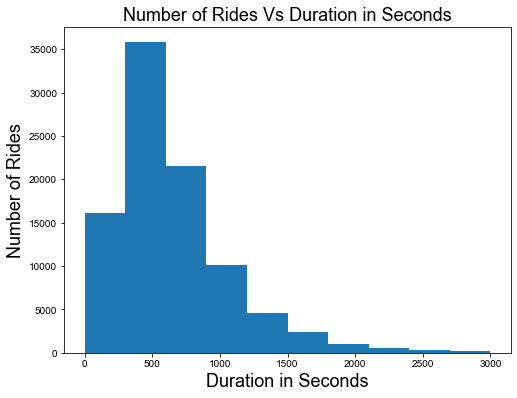

In [31]:
plt.figure(figsize=(8,6))
plt.hist(data=ford[ford['duration_sec']<3000],x='duration_sec',bins=bin_edges)
sb.set_style('darkgrid')
plt.title('Number of Rides Vs Duration in Seconds',fontsize=18)
plt.xlabel('Duration in Seconds',fontsize=18)
plt.ylabel('Number of Rides',fontsize=18);

#### The duration of most number of rides is approximately between 350 seconds to 600 seconds.The distribution is right skewed and unimodal.Gradually the average seconds decrease from 600 to 2000.The most important insight is that most of the rides range between 1 to 2000 seconds with 350 to 600 being the peak.

In [33]:
base_color = sb.color_palette()[0]

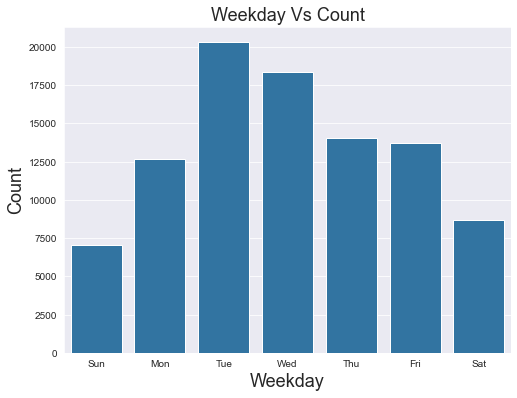

In [34]:
plt.figure(figsize=(8,6))
sb.countplot(data=ford,x='start_time_weekday',order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],color=base_color)
plt.title('Weekday Vs Count',fontsize=18)
plt.xlabel('Weekday',fontsize=18)
plt.ylabel('Count',fontsize=18);

#### The insight has most number of rides on Tuesday and Wednesday.The lowest number of rides taken are on Sunday which can be attributed to being a holiday.The unusual increase in the rides must be verified with situations like less availability of public transport on Tuesday or anything else

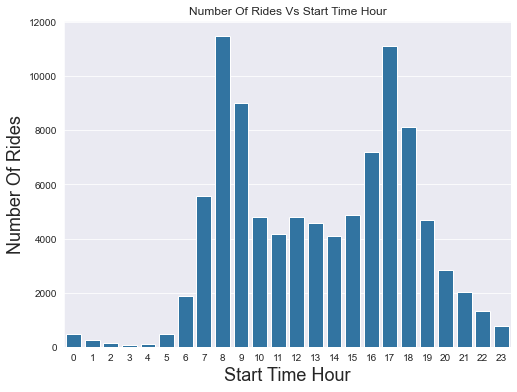

In [35]:
plt.figure(figsize=(8,6))
sb.countplot(data=ford,x='start_time_hour',color=base_color)
plt.title('Number Of Rides Vs Start Time Hour')
plt.xlabel('Start Time Hour',fontsize=18)
plt.ylabel('Number Of Rides',fontsize=18);

#### The insight is bimodal with 8 and 17 being the two modes.This unusual number of rides as 8 can be attributed to the office opening hours (rush hours) and at 17 to office closing hours.

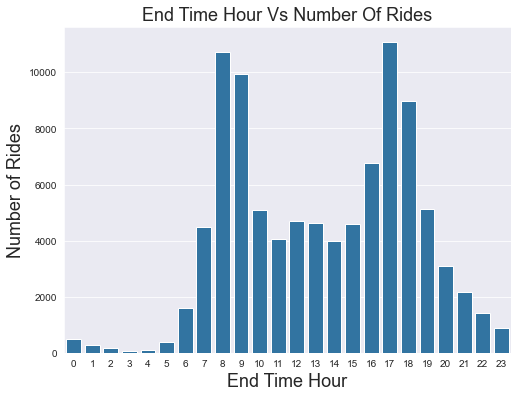

In [36]:
plt.figure(figsize=(8,6))
sb.countplot(data=ford,x='end_time_hour',color=base_color)
plt.title('End Time Hour Vs Number Of Rides',fontsize=18)
plt.xlabel('End Time Hour',fontsize=18)
plt.ylabel('Number of Rides',fontsize=18);

#### Most of the rides end at 8 and 17.This again can be attributed to the office going people who start and end the rides at the same hours.

In [37]:
ford[ford['duration_min']<80].count()

duration_sec               93509
start_time                 93509
end_time                   93509
start_station_id           93509
start_station_name         93509
start_station_latitude     93509
start_station_longitude    93509
end_station_id             93509
end_station_name           93509
end_station_latitude       93509
end_station_longitude      93509
bike_id                    93509
user_type                  93509
bike_share_for_all_trip    93509
start_time_month           93509
start_time_month_num       93509
start_time_weekday         93509
start_time_hour            93509
end_time_hour              93509
duration_min               93509
displacement_km            93509
dtype: int64

In [38]:
bin_edges = np.arange(0,ford[ford['duration_min']<80]['duration_min'].max() + 2,2)

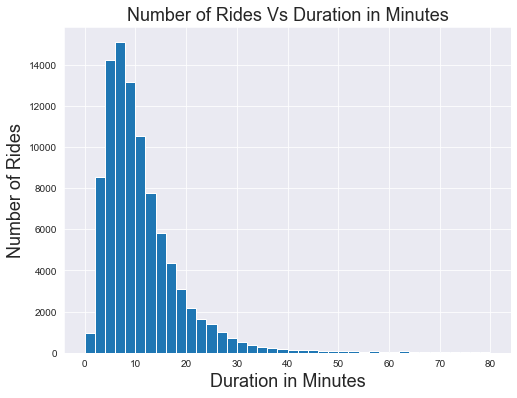

In [40]:
plt.figure(figsize=(8,6))
plt.hist(data=ford,x='duration_min',color=base_color,bins=bin_edges)
plt.title('Number of Rides Vs Duration in Minutes',fontsize=18)
plt.xlabel('Duration in Minutes',fontsize=18)
plt.ylabel('Number of Rides',fontsize=18);

#### The insight reveals that most of the rides range from 5 to 8 minutes with a gradual decrease from 8 to 50 minutes.5 to 10 minutes rides do not seem too much and hence these rides must be related to office hours with most of the people the service for office purposes to ride from their home to office and vice versa.

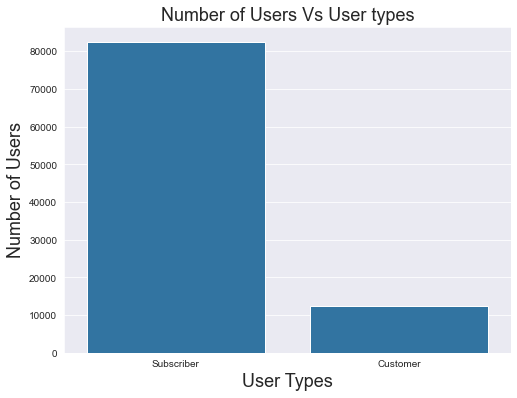

In [41]:
plt.figure(figsize=(8,6))
sb.countplot(data=ford,x='user_type',color=base_color)
plt.title('Number of Users Vs User types',fontsize=18)
plt.xlabel('User Types',fontsize=18)
plt.ylabel('Number of Users',fontsize=18);

#### Most of the users are subscribers approximately ranging upto 82000. The customer type is way less at 11000.The service seems to be more inclined to the subscribers and the nature of the subscribers would be evaluated further.

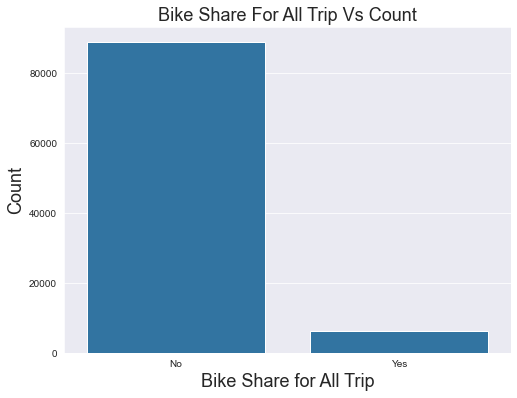

In [43]:
plt.figure(figsize=(8,6))
sb.countplot(data=ford, x='bike_share_for_all_trip', color=base_color);
plt.title('Bike Share For All Trip Vs Count',fontsize=18)
plt.xlabel('Bike Share for All Trip',fontsize=18);
plt.ylabel('Count',fontsize=18);

#### The insight suggests that most of the rides are not shared approximately 90000 rides are not shared.Rest 3000 rides are shared.The users are more inclined towards solo rides.

In [44]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,displacement_km
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,No,January,1,Wed,22,19,1254,2.492254
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,No,January,1,Wed,16,15,1423,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,3039,Customer,No,January,1,Wed,14,10,1192,2.974502
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,321,Customer,No,January,1,Wed,14,7,1017,2.049710
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,617,Subscriber,No,January,1,Wed,19,6,666,2.440571


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are a lot of outliers or extreme data points that can be misleading and hence in order to avoid plotting them and to get detatiled insights we eliminate the outliers for our data and we plot the data which is most commonly occuring.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions that I observed were really informative and I have mentioned them below each insight.Yes,I performed some operations in order to adjust the outliers and get the real insights.

<a id='bi'></a>
## Bivariate Exploration


> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

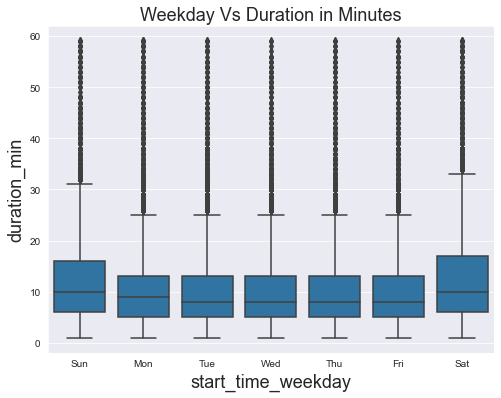

In [48]:
plt.figure(figsize=(8,6))
plt.xlabel('Weekday',fontsize=18)
plt.ylabel('Duration in Minutes',fontsize=18)
plt.title('Weekday Vs Duration in Minutes',fontsize=18)
sb.boxplot(data=ford[ford['duration_min']<60],x='start_time_weekday',y='duration_min',order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],color=base_color);

#### The plot highlights that the mean of the duration in minutes is slightly higher as compared to other days(10).This can be attributed to the long rides that people take during holidays.The other days have relatively a similar mean.Although the range of a ride decreases from sunday to Monday,It remains constant until Friday and then a sudden increase in range is observed on sunday. 

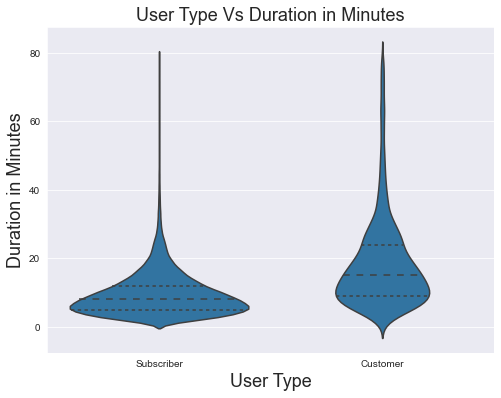

In [51]:
plt.figure(figsize=(8,6))
sb.violinplot(data=ford[ford['duration_min']<80],x='user_type',y='duration_min',color=base_color,inner='quartile')
plt.xlabel('User Type',fontsize=18)
plt.ylabel('Duration in Minutes',fontsize=18)
plt.title('User Type Vs Duration in Minutes',fontsize=18);

#### The mean duration mean in minutes for subscribers is relatively less as compared to the customers.Most of the ride duration ranges from 1 to 20 whereas the same for the customers ranges from 1 to 40.This is quite significant insight.

In [44]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,displacement_km
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,No,January,1,Wed,22,19,1254,2.492254
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,No,January,1,Wed,16,15,1423,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,3039,Customer,No,January,1,Wed,14,10,1192,2.974502
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,321,Customer,No,January,1,Wed,14,7,1017,2.049710
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,617,Subscriber,No,January,1,Wed,19,6,666,2.440571


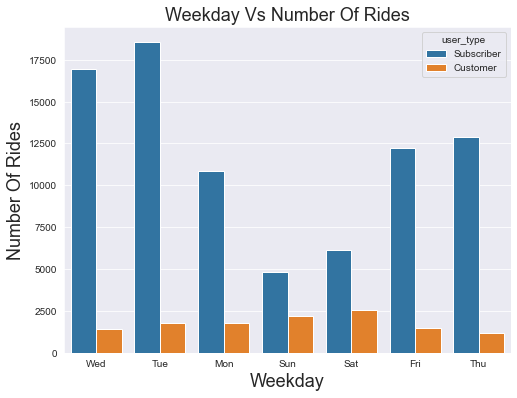

In [53]:
plt.figure(figsize=(8,6))
sb.countplot(data=ford,x='start_time_weekday',hue='user_type')
plt.title('Weekday Vs Number Of Rides',fontsize=18)
plt.xlabel('Weekday',fontsize=18)
plt.ylabel('Number Of Rides',fontsize=18);

#### The plot reveals that the customers take a relatively less number of rides as compared to the subscribers.This can be attributed to the fact that there are more number of subscribers as compared to the customers.

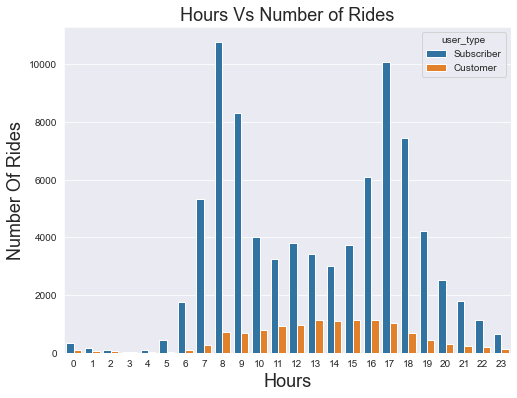

In [55]:
plt.figure(figsize=(8,6))
sb.countplot(data=ford,x='start_time_hour',hue='user_type')
plt.title('Hours Vs Number of Rides',fontsize=18)
plt.xlabel('Hours',fontsize=18)
plt.ylabel('Number Of Rides',fontsize=18);

#### As seen in the previous insight the output of the hours Vs number of rides appears to be as expected.The subscribers are relatively more involved in the business as compared to customers at any given point of time during the day.

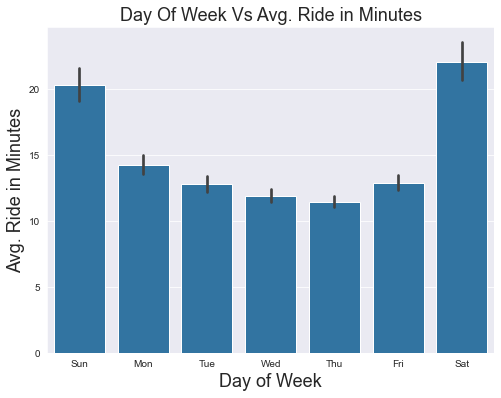

In [57]:
plt.figure(figsize=(8,6))
sb.barplot(data=ford, x='start_time_weekday', y='duration_min', color=base_color,order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.title('Day Of Week Vs Avg. Ride in Minutes',fontsize=18)
plt.xlabel('Day of Week',fontsize=18)
plt.ylabel('Avg. Ride in Minutes',fontsize=18);

#### The average ride duration in minutes for the people in more on weekends.

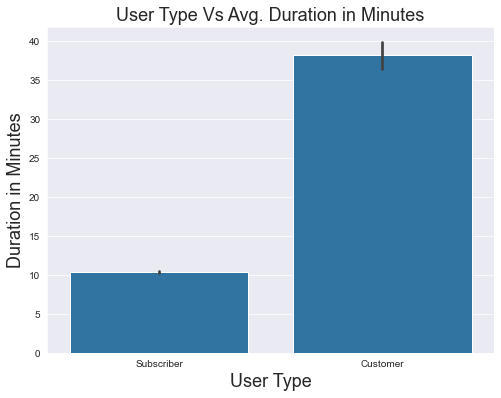

In [60]:
plt.figure(figsize=(8,6))
plt.title('User Type Vs Avg. Duration in Minutes',fontsize=18)
sb.barplot(data=ford,x='user_type',y='duration_min',color=base_color);
plt.xlabel('User Type',fontsize=18)
plt.ylabel('Duration in Minutes',fontsize=18);

#### The average duration of subscribers are way less than customers.Customers generally tend to take longer rides as compared to subscribers.The average of customers rides is approximately 40 whereas for subscribers,It is as small as 10.The customers nature can be attributed to tourists or students who explore new place and hence reflecting to a increase in the average duration.The subscribers on the other hand are mainly attributed to daily trips which they may take to reach their offices from home and vice versa.

#### The average minutes ride is maximum on Sat  followed by Sun.The weekdays has relatively shorter rides as compared to weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
I learned that the average duration in minutes for rides range from 10 to 20 minutes.Out of these rides most of the people are subscribers and a small amount of people are customers.Besides this,subscribers have a realtively lower average as compared to the customers.Subscribers average duration of ride are 10 minutes whereas for customers the average is 40 minutes.Maximum duration rides are generally observed on weekends i.e Saturdays and Sundays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes,I observed an unexpected insight that customers tend to take longer rides as compared to subscribers.This factor can be used to verify the fact that subscribers can be mostly office going people having their offices at 10 minutes distances.

<a id='multi'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

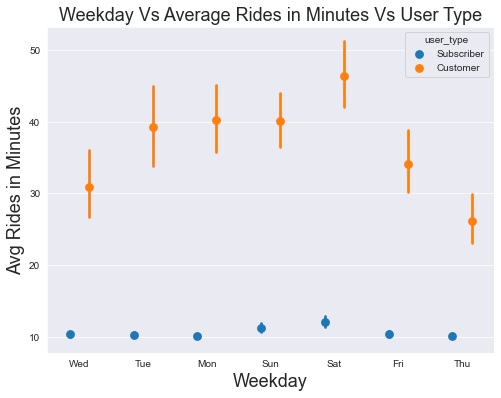

In [62]:
plt.figure(figsize=(8,6))
sb.pointplot(data=ford, x='start_time_weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Weekday',fontsize=18);
plt.ylabel('Avg Rides in Minutes',fontsize=18);
plt.title('Weekday Vs Average Rides in Minutes Vs User Type',fontsize=18);

#### As Expected,Customers have a higher ride duration of approximately 40 minutes whereas the subscribers have a average ride duration of 10 minutes.Subscribers are office going people whereas customers are mostly tourists or students who explore new places.

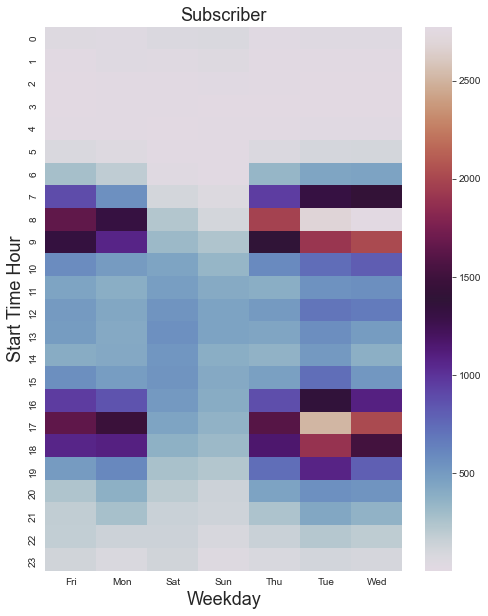

In [78]:
plt.figure(figsize=(8,10))
ford_subs = ford.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
ford_subs = ford_subs.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
heat_map = sb.heatmap(ford_subs, cmap = 'twilight')

plt.title("Subscriber", fontsize=18)
plt.xlabel('Weekday', fontsize = 18)
plt.ylabel('Start Time Hour', fontsize=18);

#### At the Weekdays most of the rides are initiated.The peak hours for the same being 8 in the morning and 5 in the evening.Besides this,The weekend reides are more evenly spread out as compared to the weekdays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The plots revealed as strengthen the fact that most of the rides are taken on weekdays as compared to the weekends.The rides are more clustered to 8 am in the morning and 17 pm in the evening.Besides this customers are the people who are more inclined to longer rides as compared to the subscribers.Subscribers have an average ride duration of 10 minutes whereas for customers is 40 minutes.

### Were there any interesting or surprising interactions between features?
Most of the findings were a verification to the previous facts.

<a id='summary'></a>
## Summary

## I learned that the average duration in minutes for rides range from 10 to 20 minutes.Out of these rides most of the people are subscribers and a small amount of people are customers.Besides this,subscribers have a realtively lower average as compared to the customers.Subscribers average duration of ride are 10 minutes whereas for customers the average is 40 minutes.Maximum duration rides are generally observed on weekends i.e Saturdays and Sundays.